In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [6]:
file_path = "adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
dataset =pd.read_csv(file_path, names=columns, na_values=',')
data.info()
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'adult.data'

In [ ]:
data['income'] = data['income'].str.strip()
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data.replace(' ?', pd.NA, inplace=True)

NameError: name 'data' is not defined

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

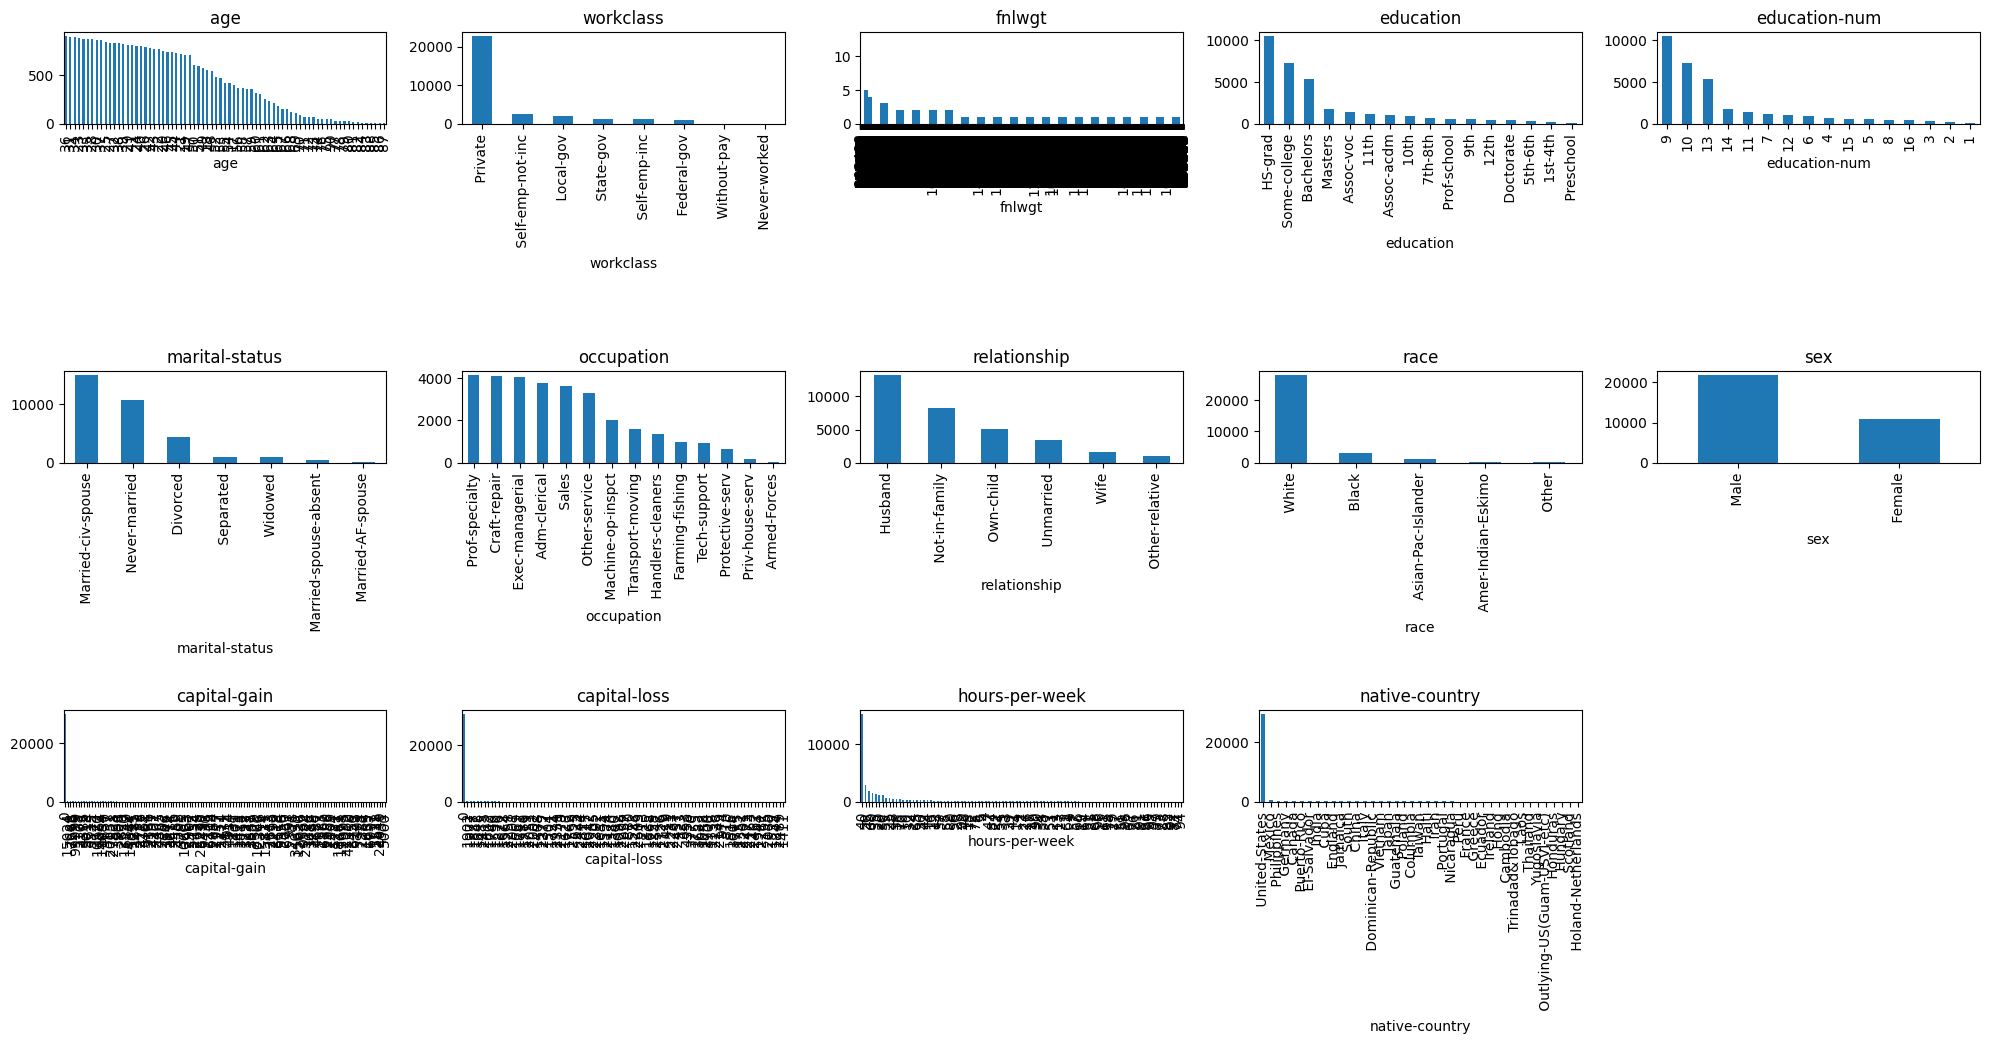

In [ ]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:14]):
    plt.subplot(5, 5, i+1)
    data[column].value_counts().plot(kind='bar', title=column)
plt.tight_layout()
plt.show()

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [ ]:
data.fillna(data.mode().iloc[0], inplace=True)
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])
data_ordinal = data[categorical_features]
print("Data setelah diubah ke ordinal:")
data.head()

Data setelah diubah ke ordinal:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,0
1,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
2,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
3,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
4,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0


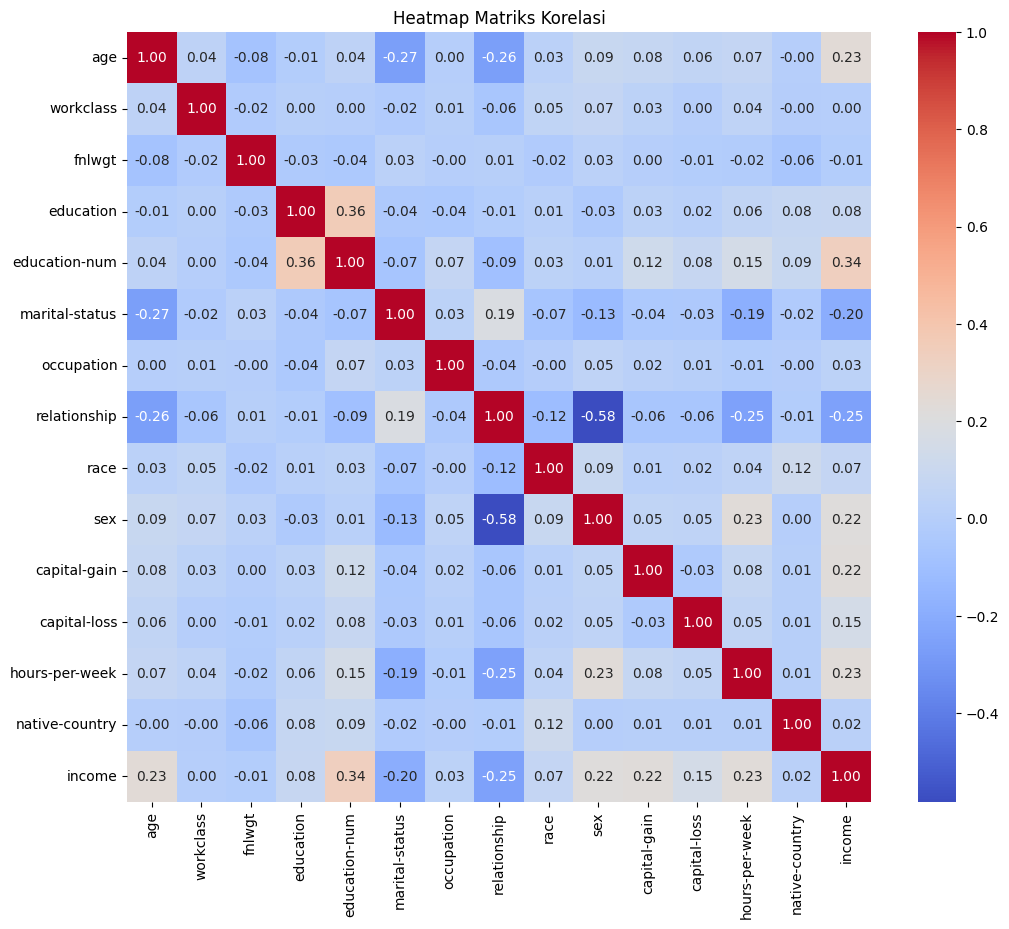

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matriks Korelasi")
plt.show()

In [ ]:
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10, 20]}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Parameter optimal:", best_params)
grid_search.best_estimator_

Parameter optimal: {'max_depth': 5, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, random_state=42)

Hasil evaluasi pada data training:
Akurasi: 0.8616661543190901
Presisi: 0.7944444444444444
Recall: 0.55859375

Hasil evaluasi pada data testing:
Akurasi: 0.8375221964212539
Presisi: 0.7455935442769166
Recall: 0.49653514354405315


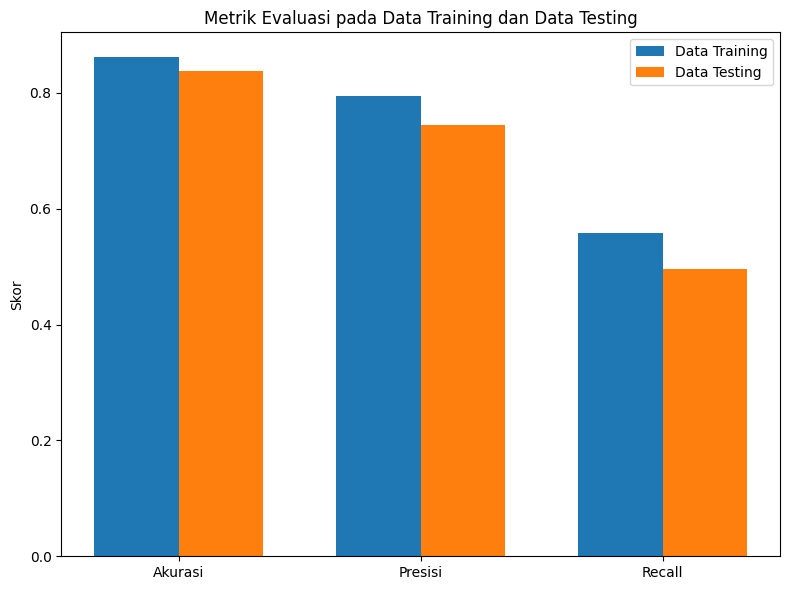

In [ ]:
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Hasil evaluasi pada data training:")
print("Akurasi:", train_accuracy)
print("Presisi:", train_precision)
print("Recall:", train_recall)
print("\nHasil evaluasi pada data testing:")
print("Akurasi:", test_accuracy)
print("Presisi:", test_precision)
print("Recall:", test_recall)

labels = ['Akurasi', 'Presisi', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

x = np.arange(len(labels))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width/2, train_scores, bar_width, label='Data Training')
bars2 = ax.bar(x + bar_width/2, test_scores, bar_width, label='Data Testing')

ax.set_ylabel('Skor')
ax.set_title('Metrik Evaluasi pada Data Training dan Data Testing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

Confusion Matrix:
[[21015  1198]
 [ 3560  3511]]


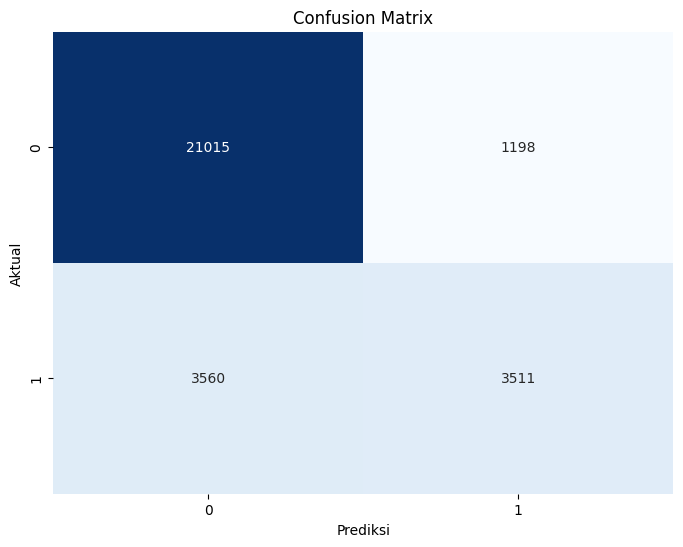

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()